<a href="https://colab.research.google.com/github/Marcll0/R/blob/main/Regress%C3%A3o_Multipla.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
library(readxl)
url <- "https://github.com/Smolski/livroavancado/raw/master/arvore2.xlsx"
destfile <- "arvore2.xlsx"
curl::curl_download(url, destfile)
arvore2 <- read_excel(destfile)
attach(arvore2)
head(arvore2)

Nomecientifico,diametro_cm,altura_m,especie
<chr>,<dbl>,<dbl>,<dbl>
Sebastiania commersoniana,52.2,15.2,0
Sebastiania commersoniana,95.0,17.3,0
Sebastiania commersoniana,67.3,16.3,0
Sebastiania commersoniana,46.3,14.0,0
Sebastiania commersoniana,64.1,15.0,0
Sebastiania commersoniana,122.0,22.0,0


In [2]:
modelom=lm(altura_m~diametro_cm+especie)
modelom


Call:
lm(formula = altura_m ~ diametro_cm + especie)

Coefficients:
(Intercept)  diametro_cm      especie  
   12.69592      0.05713     -1.62517  


In [3]:
summary(modelom)


Call:
lm(formula = altura_m ~ diametro_cm + especie)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.2688 -0.7663 -0.1236  0.8132  2.8727 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 12.69592    0.38639  32.857  < 2e-16 ***
diametro_cm  0.05713    0.00445  12.837  < 2e-16 ***
especie     -1.62517    0.24459  -6.644 1.52e-09 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.185 on 102 degrees of freedom
Multiple R-squared:  0.6995,	Adjusted R-squared:  0.6937 
F-statistic: 118.7 on 2 and 102 DF,  p-value: < 2.2e-16


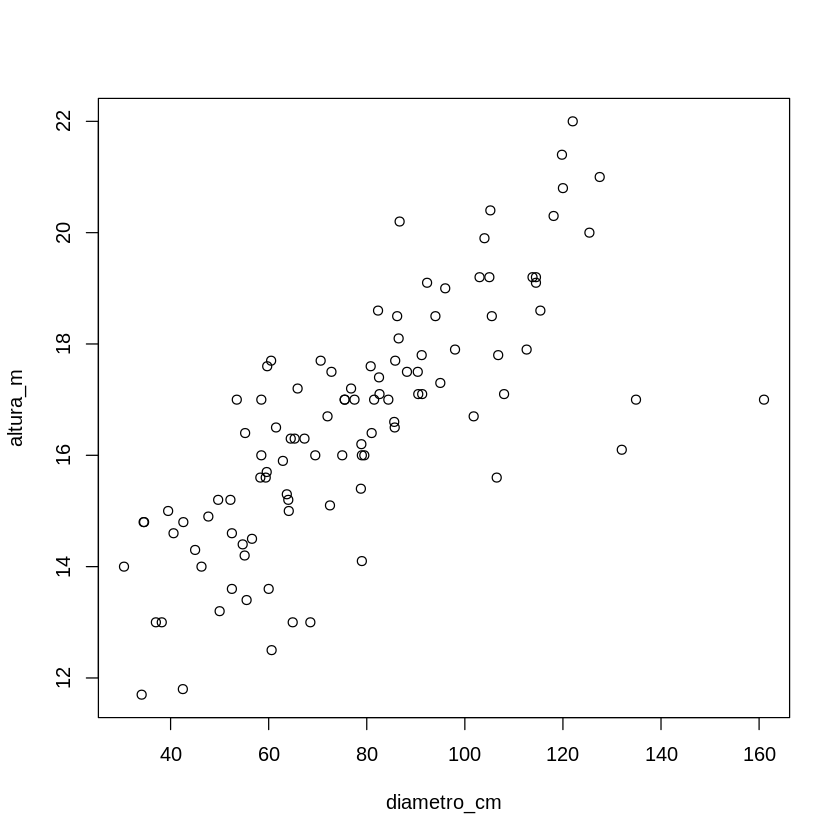

In [4]:
plot(diametro_cm,altura_m)

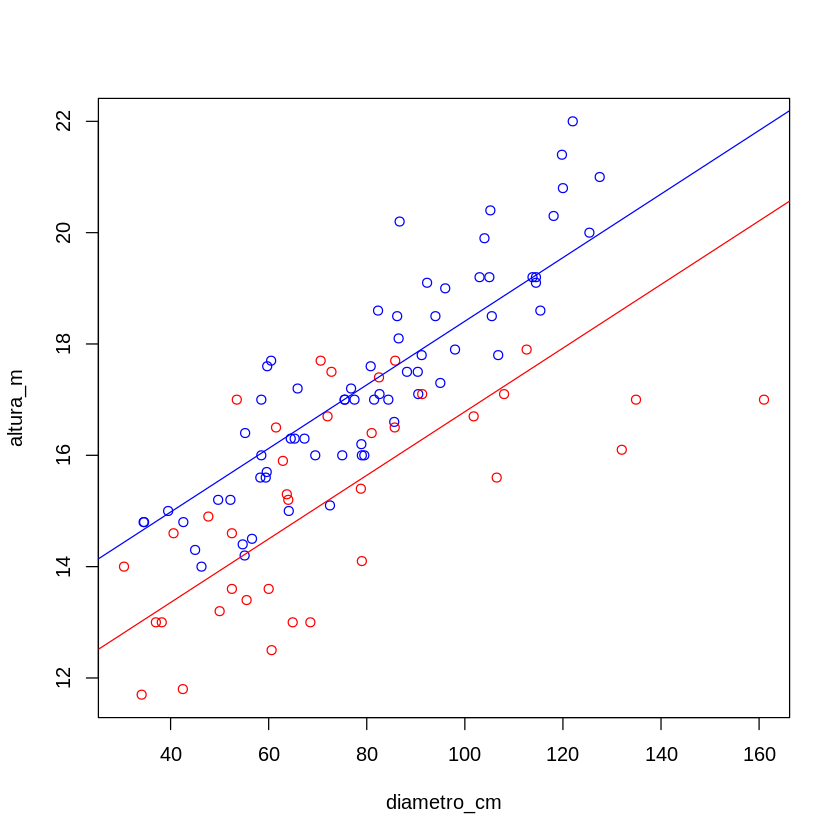

In [5]:
# Gera o gráfico sem pontos
plot(diametro_cm,altura_m,type='n')
# Acrescenta os pontos
points(diametro_cm[especie==0],altura_m[especie==0],col='blue')
points(diametro_cm[especie==1],altura_m[especie==1],col='red')
# Acrescenta as linhas
abline(coef(modelom)[1], coef(modelom)[2], col='blue')
abline(coef(modelom)[1]+coef(modelom)[3], coef(modelom)[2], col='red')

In [6]:
#modelo com interação
modelom=lm(`altura_m`~`diametro_cm`+especie+`diametro_cm`:especie, data = arvore2)
modelom


Call:
lm(formula = altura_m ~ diametro_cm + especie + diametro_cm:especie, 
    data = arvore2)

Coefficients:
        (Intercept)          diametro_cm              especie  
           11.54805              0.07137              0.78630  
diametro_cm:especie  
           -0.03158  


In [7]:
summary(modelom)


Call:
lm(formula = altura_m ~ diametro_cm + especie + diametro_cm:especie, 
    data = arvore2)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.24597 -0.85455  0.06317  0.75516  2.55607 

Coefficients:
                     Estimate Std. Error t value Pr(>|t|)    
(Intercept)         11.548047   0.475441  24.289  < 2e-16 ***
diametro_cm          0.071375   0.005655  12.620  < 2e-16 ***
especie              0.786303   0.683038   1.151 0.252375    
diametro_cm:especie -0.031579   0.008421  -3.750 0.000295 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.116 on 101 degrees of freedom
Multiple R-squared:  0.7363,	Adjusted R-squared:  0.7284 
F-statistic: 93.99 on 3 and 101 DF,  p-value: < 2.2e-16


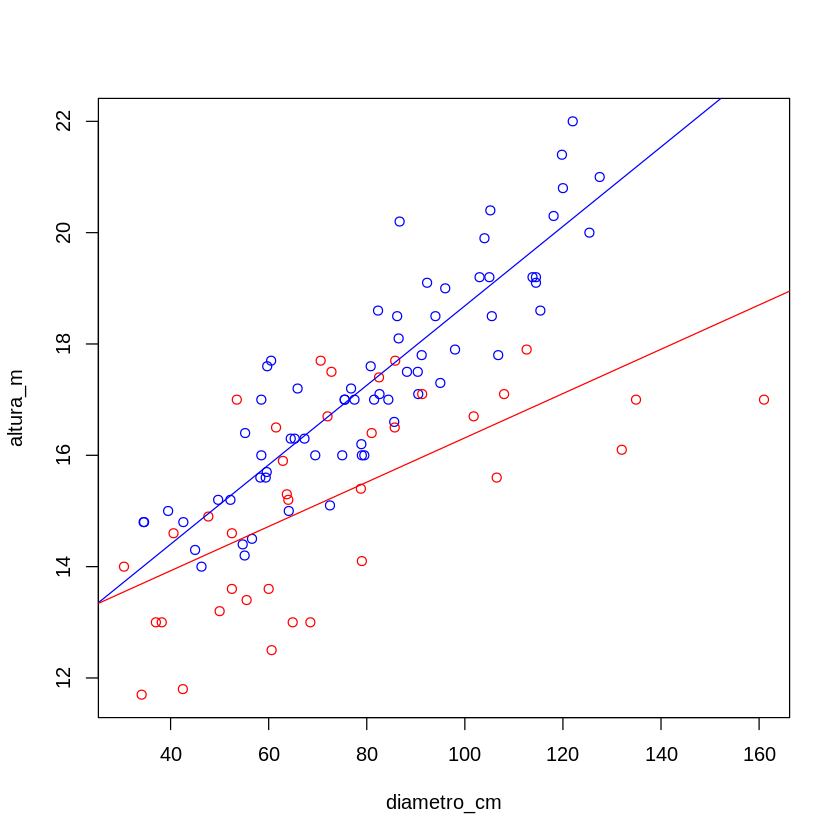

In [8]:
plot(diametro_cm,altura_m,type='n')

points(diametro_cm[especie==0],altura_m[especie==0],col='blue')
points(diametro_cm[especie==1],altura_m[especie==1],col='red')

abline(coef(modelom)[1],coef(modelom)[2], col='blue')
abline(coef(modelom)[1]+coef(modelom)[3],coef(modelom)[2]+coef(modelom)[4], col='red')